## SVM : Support Vector Machine
### Index
1. SVM 기본 개념
2. 비선형 데이터의 분류
3. SVM 특징
4. SVM 예제

#### 1. SVM 기본 개념
- `https://scikit-learn.org/stable/modules/svm.html`
- 데이터분포 특징이 없을때 앞에서 배운 LDA를 사용하면 성능이 잘 나오지 않음
    - LDA는 데이터가 그룹별로 비슷한 공분산을 가져야함
- "경계선,초평면(decision boundary)을 어떻게 나눠서 데이터를 분류할까?"에 집중한 알고리즘
- 기본적인 아이디어는 $\frac{1}{||w||}$(Margin)를 적절하게 설정해서 경계선을 찾는것이 목적
- support vector 
    - $f(x) = x^T\beta + \beta_0 = 1,  x^T\beta + \beta_0 = -1$ 위에 있는 데이터
- SVM은 $\beta$ 값과 $\beta_0$ 값을 찾는 과정

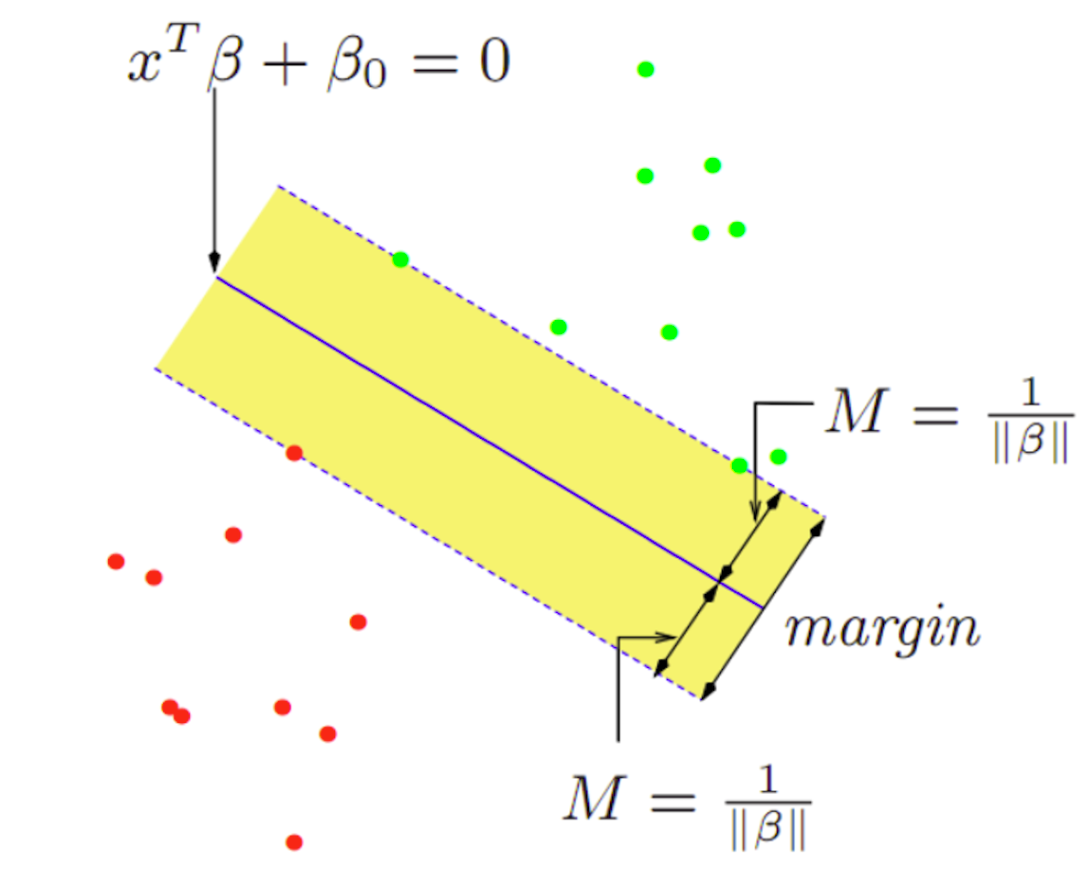

#### 라그랑주 승수법 : Lagrange multiplier method
- $w$ 값과 $b$ 값을 찾는 최적화 문제를 푸는 방법
- 제약조건 $g(x, y)\leq c$를 만족하는 $f(x, y)=k$의 최대값 찾기
- $f$와 $g$의 미분값이 같아지는 지점을 찾으면 된다.
    - $\nabla{f} = \lambda\nabla{g}$ (위의 그림에서는 $\lambda$ 값이 1)
    - $L(x, y, \lambda) = f(x, y) - \lambda(g(x, y) - c)$
- $L(x, y, \lambda)$ 값을 최대화 하는 수식이 $x^T\beta + \beta_0 = 1,  x^T\beta + \beta_0 = -1$가 되게 설정하여 $\beta$와 $\beta_0$를 찾을수 있습니다.

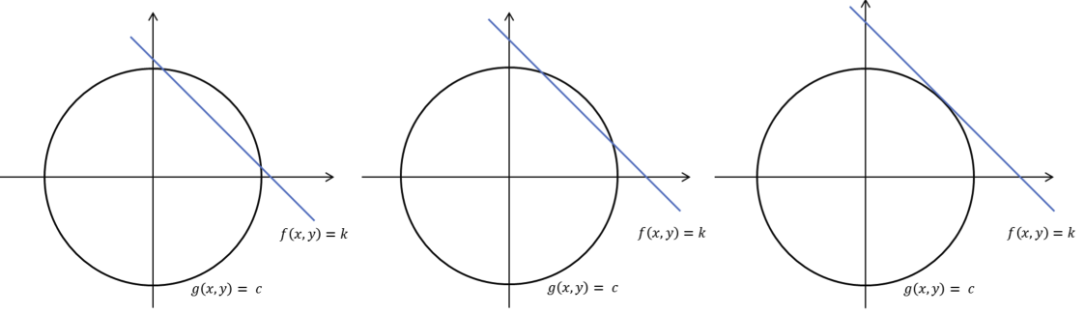

- 초평면 수식 : $f(x) = x^T\beta * \beta_0 = 0$
    - $||\beta||=1$ 조건을 설정 (서로 다른 $\beta$가 구해지는것을 방지)


- margin을 최대로 만드는 수식

    - $y_i(x^T_i\beta + \beta_0) \geq 0$
        - 빨간 데이터의 $y_i$는 $-$ 값을 갖고, 파란 데이터의 $y_i$는 $+$ 값을 갖기 때문에 항상 $+$가 됨
    
$${max \atop {\beta,\beta_0,||\beta||==1}} \, M(margin)$$


$$y_i(x^T_i\beta + \beta_0) \leq M$$

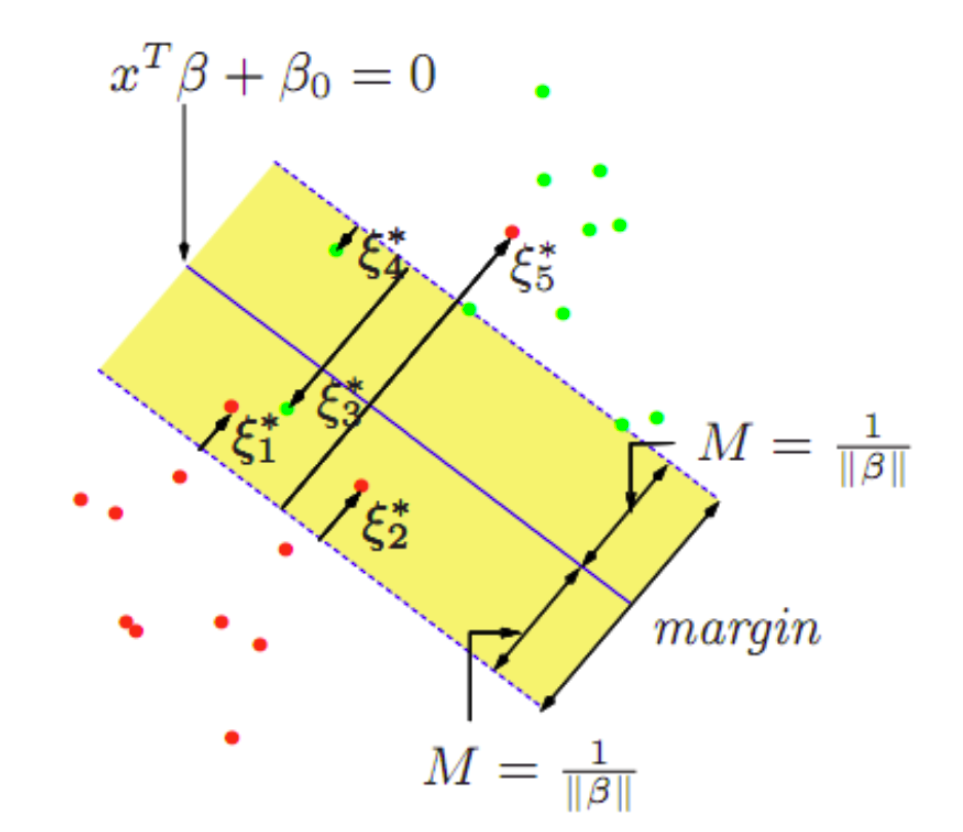

- 에러를 허용하는 경우
    - $𝜉$(크사이:$kxi$)의 전체 합이 constance를 넘으면 안되도록 제약, constance가 클수록 많은 error를 허용
    - $𝜉_3, 𝜉_5$는 1보다 큼 초평면을 벗어나서 margin의 $-$까지도 허용

$${max \atop {\beta,\beta_0,||\beta||==1}} \, M(margin)$$

$$y_i(x^T_i\beta + \beta_0) \leq M(1-𝜉_i)$$

$$(𝜉 \geq 0, \sum \, 𝜉_i \leq constance)$$

- cost function
  - ${min \atop {\beta,\beta_0}}\frac{1}{2}||\beta||^2+C\sum_{i=1}^{N}{𝜉_i}$
  - subject to $𝜉_i \geq 0, y_i(x^T_i\beta + \beta_0) \geq 1 - 𝜉_i$
  - C가 클수록 error를 작게 허용

#### 2. 비선형 데이터의 분류
- Kernel
  - `https://www.youtube.com/embed/3liCbRZPrZA?rel=0`
  - $d^{th}$-degree polynomial
    - d를 올릴수록 모형을 복잡하게 만들수 있다
    - 차원이 높아지면 조정해야 하는 모수의 개수가 많아져 overfitting 될수 있다.

- feature $x$ -> $x, x^2$

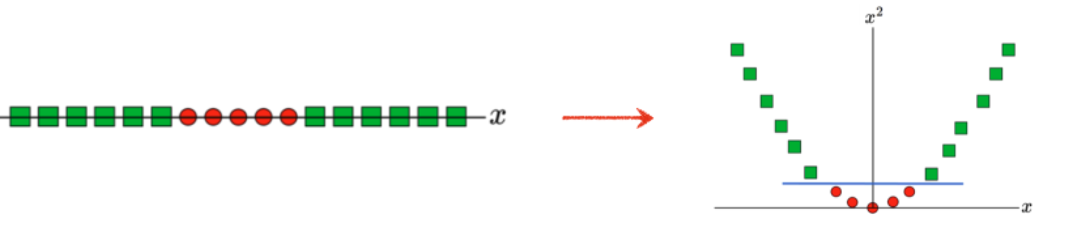

- feature $x_1, x_2 -> (x_1, x_2)^2 -> x_1^2 +  \sqrt{2}x_1x_2 + x_2^2$

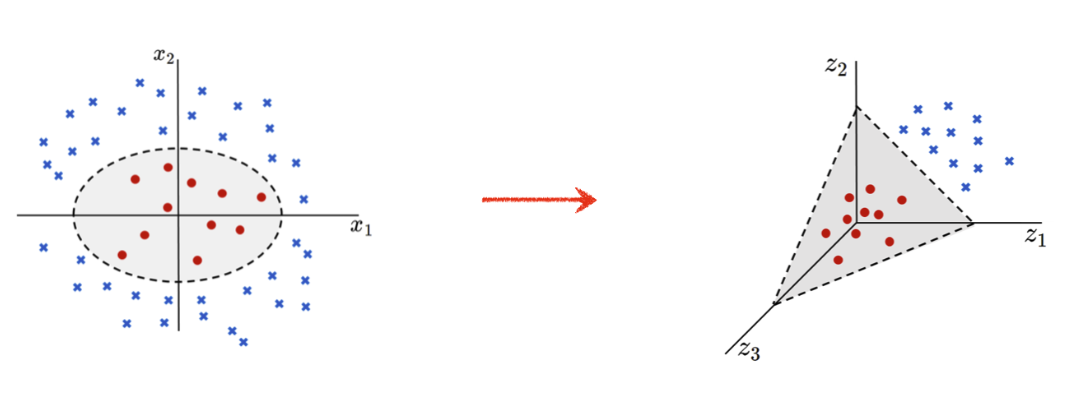

#### 3. SVM 특징
- 장점
    - 데이터의 분포를 가정하기 힘들때 사용가능
    - 예측 정확도가 높음
- 단점
    - cost function의 c 값을 정해야함 (C가 클수록 error를 적게 허용)
    - 계산시간이 오래걸림
- hyper parameter
    - cost : 에러의 허용 범위를 설정
    - gamma : 곡률을 지정

#### 4. SVM 예제

In [ ]:
%config InlineBackend.figure_formats = {'png', 'retina'}

import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2] # 꽃받침 길이, 넓이 데이터만 사용
y = iris.target

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow")
plt.show()

#### LinearSVC

- 하이퍼 파라미터로 cost 설정
    - cost : 얼마나 많은 샘플데이터를 다른 클래스에 허용하는가에 대한 파라미터
    - 작을수록 많이 허용
    - cost가 낮으면 과소적합, 높으면 과대적합이 될수 있음

In [ ]:
model_1 = svm.SVC(kernel='linear', C=1).fit(X, y)
y_pred_1 = model_1.predict(X)

print(model_1.score(X, y))
confusion_matrix(y, y_pred_1)

In [ ]:
model_1 = svm.SVC(kernel='linear', C=0.1).fit(X, y)
y_pred_1 = model_1.predict(X)

print(model_1.score(X, y))
confusion_matrix(y, y_pred_1)

In [ ]:
model_1 = svm.SVC(kernel='linear', C=0.01).fit(X, y)
y_pred_1 = model_1.predict(X)

print(model_1.score(X, y))
confusion_matrix(y, y_pred_1)

#### rbf kernel
- radial basis function
- SVM에서 가장 많이 사용되는 방법
- 데이터를 고차원 공간으로 사상해서 초평면을 구하는 방법
    - grid search를 이용해서 최적의 cost와 gamma를 찾아야함
    - gamma는 결정 경계의 곡률을 정함
    - cost와 gamma가 커질수록 알고리즘의 복잡도가 증가함 -> overfitting이 됨

In [ ]:
model_2 = svm.SVC(kernel='rbf', gamma=0.7, C=1).fit(X, y)
y_pred_2 = model_2.predict(X)

print(model_2.score(X, y))
confusion_matrix(y, y_pred_2)

#### polynomial kernel
- 다항커널
- degree : 차원

In [ ]:
model_3 = svm.SVC(kernel='poly', degree=2, gamma="auto", C=1).fit(X,y)
y_pred_3 = model_3.predict(X)

print(model_3.score(X, y))
confusion_matrix(y, y_pred_3)

#### visualization
    - 정확도도 중요하지만 시각화 했을때 얼마나 지역을 잘 구분하였는가하는 모양도 중요합니다.

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [ ]:
titles = ('1. SVC with linear kernel',
          '2. SVC with RBF(gamma:10, C:1) kernel',
          '3. SVC with RBF(gamma:0.5, C:1) kernel',
          '4. SVC with RBF(gamma:0.5, C:100) kernel',
          '5. SVC with RBF(gamma:0.5, C:100000) kernel',
          '6. SVC with polynomial (degree 3) kernel')

In [ ]:
models = (svm.SVC(kernel='linear', C=1),
          svm.SVC(kernel='rbf', gamma=10, C=1),
          svm.SVC(kernel='rbf', gamma=0.5, C=1),
          svm.SVC(kernel='rbf', gamma=0.5, C=100),
          svm.SVC(kernel='rbf', gamma=0.5, C=100000),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=1))

models = (model.fit(X, y) for model in models)

fig, sub = plt.subplots(2, 3, figsize=(20, 10))
xx, yy = make_meshgrid(X[:, 0], X[:, 1])

for model, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, model, xx, yy, cmap="rainbow", alpha=0.5)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow", s=20, edgecolors='k')
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("{}:{}".format(title, np.round(model.score(X, y), 3)))

plt.show()

- cost가 커질수록 이상치 존재 가능성이 낮아집니다.
    - 4, 5번 모델이 C 값이 커지니 이상치에 대한 데이터를 줄이기 위해서 부적절하게 지역이 구분되는것을 확인할수 있습니다.
- gamma 가 높으면 과대적합될수 있습니다.
    - 2번 모델이 정확도는 높지만 과대적합되었다는것을 확인할수 있습니다.